In [2]:
from bs4 import BeautifulSoup
import requests
import pandas.util.testing as tm
import pandas as pd
import numpy as np
import re

from matplotlib import style
# generate random integer values
from numpy.random import seed
from numpy.random import randint
from numpy.random import randn
import seaborn as sns
import statistics 
import string
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import sklearn
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


/Users/bhupendrasingh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
df=pd.read_excel('~/Desktop/FOOTBALL/Final3.xlsx')
df

,Unnamed: 0,Player,MV,Nation,Pos,Club,Leauge,Age,MP,Starts,...,Clr,Passes Completed,Passes Attempted,Cmp%,Touches,Succ_y,Att,Succ%,#Pl,NR
0,0,Kylian Mbappé,180.0,FRA,FW,PSG,Ligue1,21,49,41,...,3,1152,1494,77.11,2120,132,247,53.44,152,1
1,1,Raheem Sterling,128.0,ENG,FW,Manchester City,Premier Leauge,24,60,56,...,13,1963,2414,81.32,3209,139,258,53.88,151,2
2,2,Neymar,128.0,BRA,"MF,FW",PSG,Ligue1,27,32,31,...,2,1588,2016,78.77,2696,164,292,56.16,184,1
3,3,Sadio Mané,120.0,SEN,FW,Liverpool,Premier Leauge,27,64,61,...,11,1728,2214,78.05,3050,128,212,60.38,142,3
4,4,Mohamed Salah,120.0,EGY,FW,Liverpool,Premier Leauge,27,65,64,...,5,1516,2029,74.72,2893,137,229,59.83,148,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,378,Nélson Semedo,32.0,POR,DF,Barcelona,La Liga,26,26,20,...,22,1098,1217,90.20,1406,31,54,57.40,33,2
379,379,Samuel Umtiti,32.0,FRA,DF,Barcelona,La Liga,26,14,13,...,33,839,892,94.10,979,7,10,70.00,8,1
380,380,Kieran Trippier,28.0,ENG,DF,Atlético Madrid,La Liga,29,27,26,...,67,1515,2000,75.80,2237,9,19,47.40,10,2
381,381,Ivan Perišić,17.5,CRO,"MF,FW",Inter,Serie A,31,34,30,...,44,964,1413,68.20,1778,34,57,59.60,34,2


In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df.head()

,Player,MV,Nation,Pos,Club,Leauge,Age,MP,Starts,Min,...,Clr,Passes Completed,Passes Attempted,Cmp%,Touches,Succ_y,Att,Succ%,#Pl,NR
0,Kylian Mbappé,180.0,FRA,FW,PSG,Ligue1,21,49,41,3856,...,3,1152,1494,77.11,2120,132,247,53.44,152,1
1,Raheem Sterling,128.0,ENG,FW,Manchester City,Premier Leauge,24,60,56,4968,...,13,1963,2414,81.32,3209,139,258,53.88,151,2
2,Neymar,128.0,BRA,"MF,FW",PSG,Ligue1,27,32,31,2757,...,2,1588,2016,78.77,2696,164,292,56.16,184,1
3,Sadio Mané,120.0,SEN,FW,Liverpool,Premier Leauge,27,64,61,5327,...,11,1728,2214,78.05,3050,128,212,60.38,142,3
4,Mohamed Salah,120.0,EGY,FW,Liverpool,Premier Leauge,27,65,64,5579,...,5,1516,2029,74.72,2893,137,229,59.83,148,3


In [7]:
df.replace('€','',inplace=True)
        


In [8]:
df=df.apply(pd.to_numeric, errors='ignore')

In [9]:
df.rename(columns={'Market Value in Million € ':'MV'},inplace=True)

In [10]:
df.rename(columns={'Club_x':'Club'},inplace=True)

In [11]:
df['CR']=0

In [14]:
for i in range(0,len(df)):
    if(df['Club'][i]=='PSG' or df['Club'][i]=='Manchester Utd' or df['Club'][i]=='Liverpool' or df['Club'][i]=='Real Madrid' or df['Club'][i]=='Barcelona' or df['Club'][i]=='Bayern Munich' or df['Club'][i]=='Juventus' or df['Club'][i]=='Atlético Madrid' or df['Club'][i]=='Inter' or df['Club'][i]=='Chelsea' or df['Club'][i]=='Manchester City' ):
        df['CR'][i]=1
    elif(df['Club'][i]=='Arsenal' or df['Club'][i]=='Tottenham' or df['Club'][i]=='Napoli' or df['Club'][i]=='Dortmund' or df['Club'][i]=='Leicester City' or df['Club'][i]=='Lyon' or df['Club'][i]=='Everton' or df['Club'][i]=='Valencia' or df['Club'][i]=='Sevilla' ):
        df['CR'][i]=2
    else:
        df['CR'][i]=3

/Users/bhupendrasingh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/bhupendrasingh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/bhupendrasingh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [12]:
import sys

In [13]:
Blue='#008fd5'
Red='#fc4f30'
Yellow='#e5ae37'
Green='#6d9045'
colorsz=[Blue,Green,Yellow]

In [14]:
pd.set_option('display.max_columns', None)

In [15]:
df=df.apply(pd.to_numeric, errors='ignore')

In [16]:
corr, _ = pearsonr(df['MV'],df['CR'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: nan


/Users/bhupendrasingh/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [17]:
df[['MV','Gls']]

,MV,Gls
0,180.0,51
1,128.0,29
2,128.0,28
3,120.0,37
4,120.0,39
...,...,...
378,32.0,1
379,32.0,0
380,28.0,1
381,17.5,8


In [18]:
df['Pos'].unique()

array(['FW', 'MF,FW', 'MF', 'DF', 'MF,DF', 'WB', 'DF,MF'], dtype=object)

In [19]:
A=df[(df.Pos=='FW') | (df.Pos=='MF,FW') | (df.Pos=='MF')]
D=df[(df.Pos=='DF') | (df.Pos=='MF,DF') | (df.Pos=='WB') | (df.Pos=='DF,MF') | (df.Pos=='MF')]

In [20]:
corr, _ = pearsonr(A['SoT%'],A['MV'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.228


In [21]:
corr, _ = pearsonr(D['Cmp%'],D['Age'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.188


In [22]:
#df.sort_values(by=['Touches'],ascending=False).head(20)

[Text(0.5, 0, 'Club Ranking'),
 Text(0, 0.5, 'Market Value in Million €'),
 Text(0.5, 1.0, 'MV vs Club')]

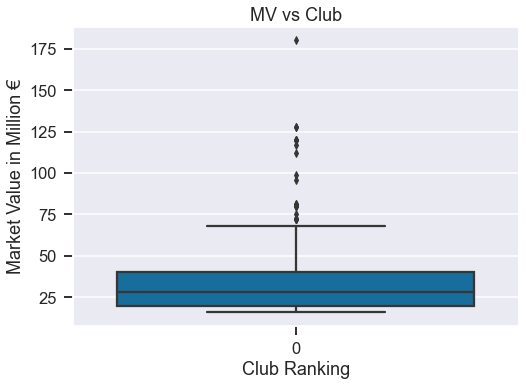

In [23]:
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
ax=sns.boxplot(y='MV', x='CR',data=df,palette="colorblind")
ax.set(xlabel='Club Ranking', ylabel='Market Value in Million €',title='MV vs Club')

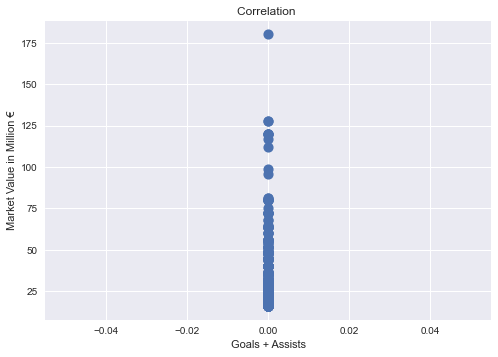

In [24]:
plt.tight_layout()
style.use('seaborn')
plt.title('Correlation ')
plt.xlabel('Goals + Assists')
plt.ylabel('Market Value in Million €')
sns.set_context('talk')
plt.scatter(df['CR'],df['MV'],s=75)


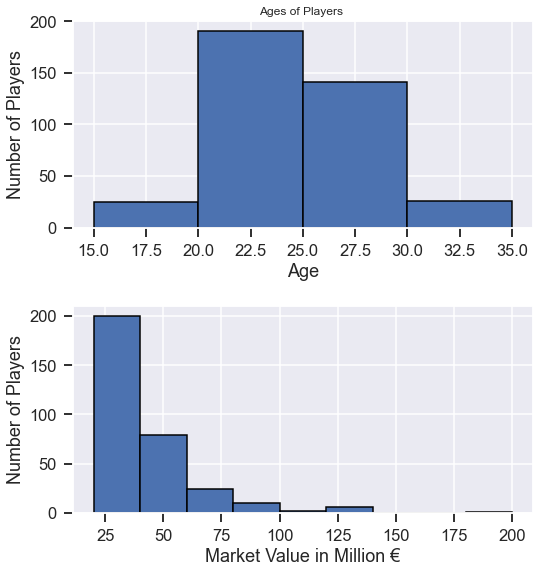

[Text(0.5, -15.559999999999864, 'Top 5 Leauges in Europe '),
 Text(42.065, 0.5, 'Market Value in Million €'),
 Text(0.5, 1.0, 'Leauge vs MV')]

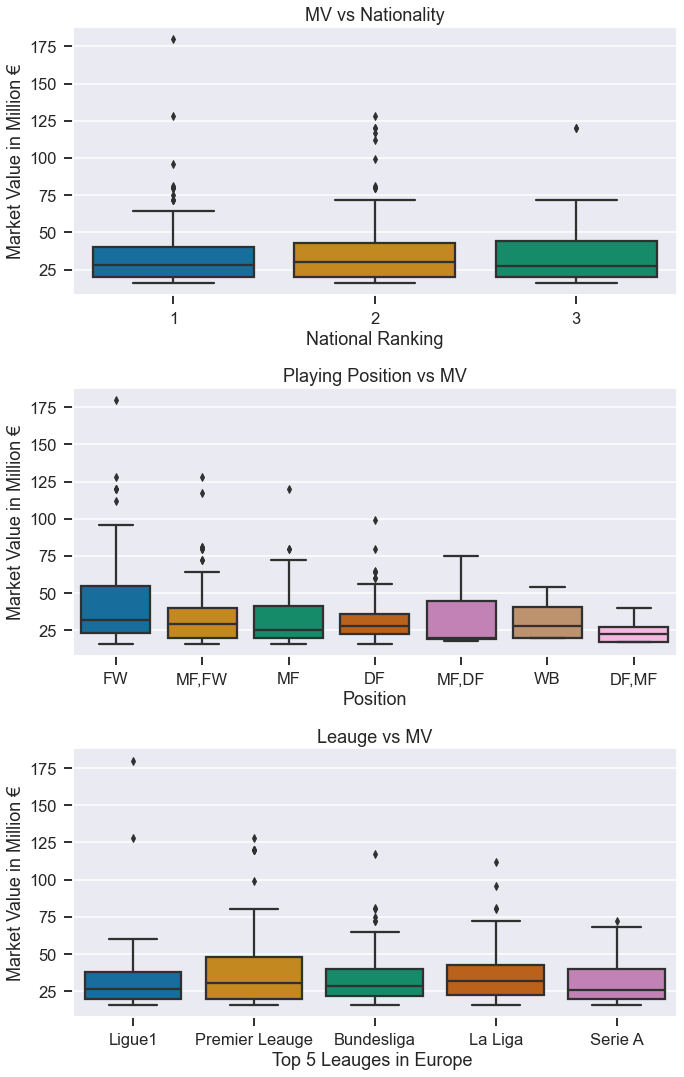

In [25]:

fig = plt.figure(figsize=(8,8))

plt.subplot(2, 1, 1)
plt.tight_layout()
style.use('seaborn')
plt.title('Ages of Players ')
plt.xlabel('Age')
plt.ylabel('Number of Players')
sns.set_context('talk')
binz=[15,20,25,30,35]
plt.hist(df['Age'],bins=binz,edgecolor='black')


plt.subplot(2, 1, 2)
plt.tight_layout()
style.use('seaborn')
plt.title('')
plt.xlabel('Market Value in Million €')
plt.ylabel('Number of Players')
sns.set_context('talk')
bins=[20,40,60,80,100,120,140,160,180,200]
plt.hist(df['MV'],bins=bins,edgecolor='black')



plt.show()

fig = plt.figure(figsize=(10,15))
plt.ylabel('Market Value in Million €')
plt.subplot(3,1,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
ax=sns.boxplot(y='MV', x='NR',data=df,palette="colorblind")
ax.set(xlabel='National Ranking', ylabel='Market Value in Million €',title='MV vs Nationality')

plt.subplot(3,1,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
ax=sns.boxplot(y='MV', x='Pos',data=df,palette="colorblind")
ax.set(xlabel='Position', ylabel='Market Value in Million €',title='Playing Position vs MV')

plt.subplot(3,1,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
ax=sns.boxplot(y='MV', x='Leauge',data=df,palette="colorblind")
ax.set(xlabel='Top 5 Leauges in Europe ', ylabel='Market Value in Million €',title='Leauge vs MV')

In [26]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


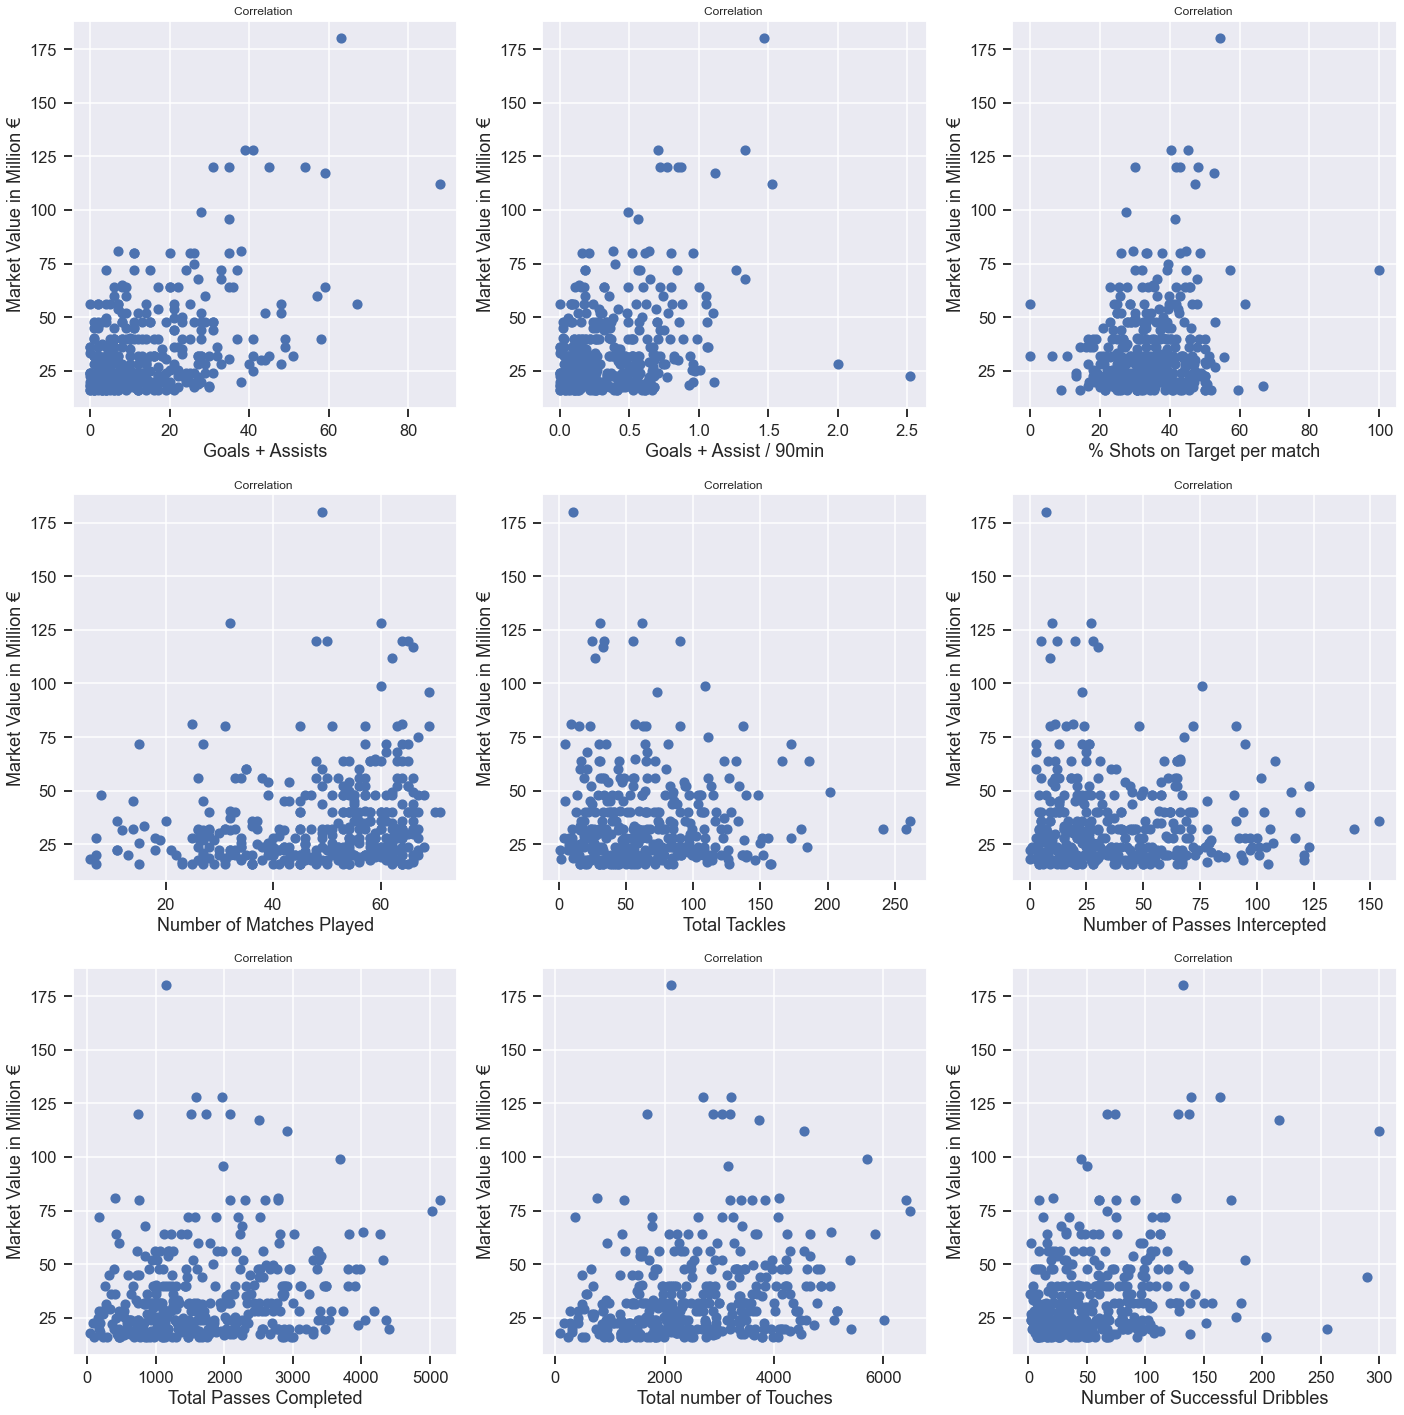

In [27]:
fig = plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
plt.tight_layout()
style.use('seaborn')
plt.title('Correlation ')
plt.xlabel('Goals + Assists')
plt.ylabel('Market Value in Million €')
sns.set_context('talk')
plt.scatter(df['Gls+Ast'],df['MV'],s=75)

plt.subplot(3,3,2)
plt.tight_layout()
style.use('seaborn')
plt.title('Correlation ')
plt.xlabel('Goals + Assist / 90min')
plt.ylabel('Market Value in Million €')
sns.set_context('talk')
plt.scatter(df['G+A'],df['MV'],s=75)

plt.subplot(3,3,3)
plt.tight_layout()
style.use('seaborn')
plt.title('Correlation ')
plt.xlabel('% Shots on Target per match')
plt.ylabel('Market Value in Million €')
sns.set_context('talk')
plt.scatter(df['SoT%'],df['MV'],s=75)


plt.subplot(3,3,4)
plt.tight_layout()
style.use('seaborn')
plt.title('Correlation ')
plt.xlabel('Number of Matches Played')
plt.ylabel('Market Value in Million €')
sns.set_context('talk')
plt.scatter(df['MP'],df['MV'],s=75)

plt.subplot(3,3,5)
plt.tight_layout()
style.use('seaborn')
plt.title('Correlation ')
plt.xlabel('Total Tackles')
plt.ylabel('Market Value in Million €')
sns.set_context('talk')
plt.scatter(df['Tackle'],df['MV'],s=75)

plt.subplot(3,3,6)
plt.tight_layout()
style.use('seaborn')
plt.title('Correlation ')
plt.xlabel('Number of Passes Intercepted')
plt.ylabel('Market Value in Million €')
sns.set_context('talk')
plt.scatter(df['Int'],df['MV'],s=75)

plt.subplot(3,3,7)
plt.tight_layout()
style.use('seaborn')
plt.title('Correlation ')
plt.xlabel('Total Passes Completed')
plt.ylabel('Market Value in Million €')
sns.set_context('talk')
plt.scatter(df['Passes Completed'],df['MV'],s=75)

plt.subplot(3,3,8)
plt.tight_layout()
style.use('seaborn')
plt.title('Correlation ')
plt.xlabel('Total number of Touches')
plt.ylabel('Market Value in Million €')
sns.set_context('talk')
plt.scatter(df['Touches'],df['MV'],s=75)

plt.subplot(3,3,9)
plt.tight_layout()
style.use('seaborn')
plt.title('Correlation ')
plt.xlabel('Number of Successful Dribbles')
plt.ylabel('Market Value in Million €')
sns.set_context('talk')
plt.scatter(df['Succ_y'],df['MV'],s=75)


In [33]:
X = df.iloc[:,6::]  #independent columns
y = df.iloc[:,1]

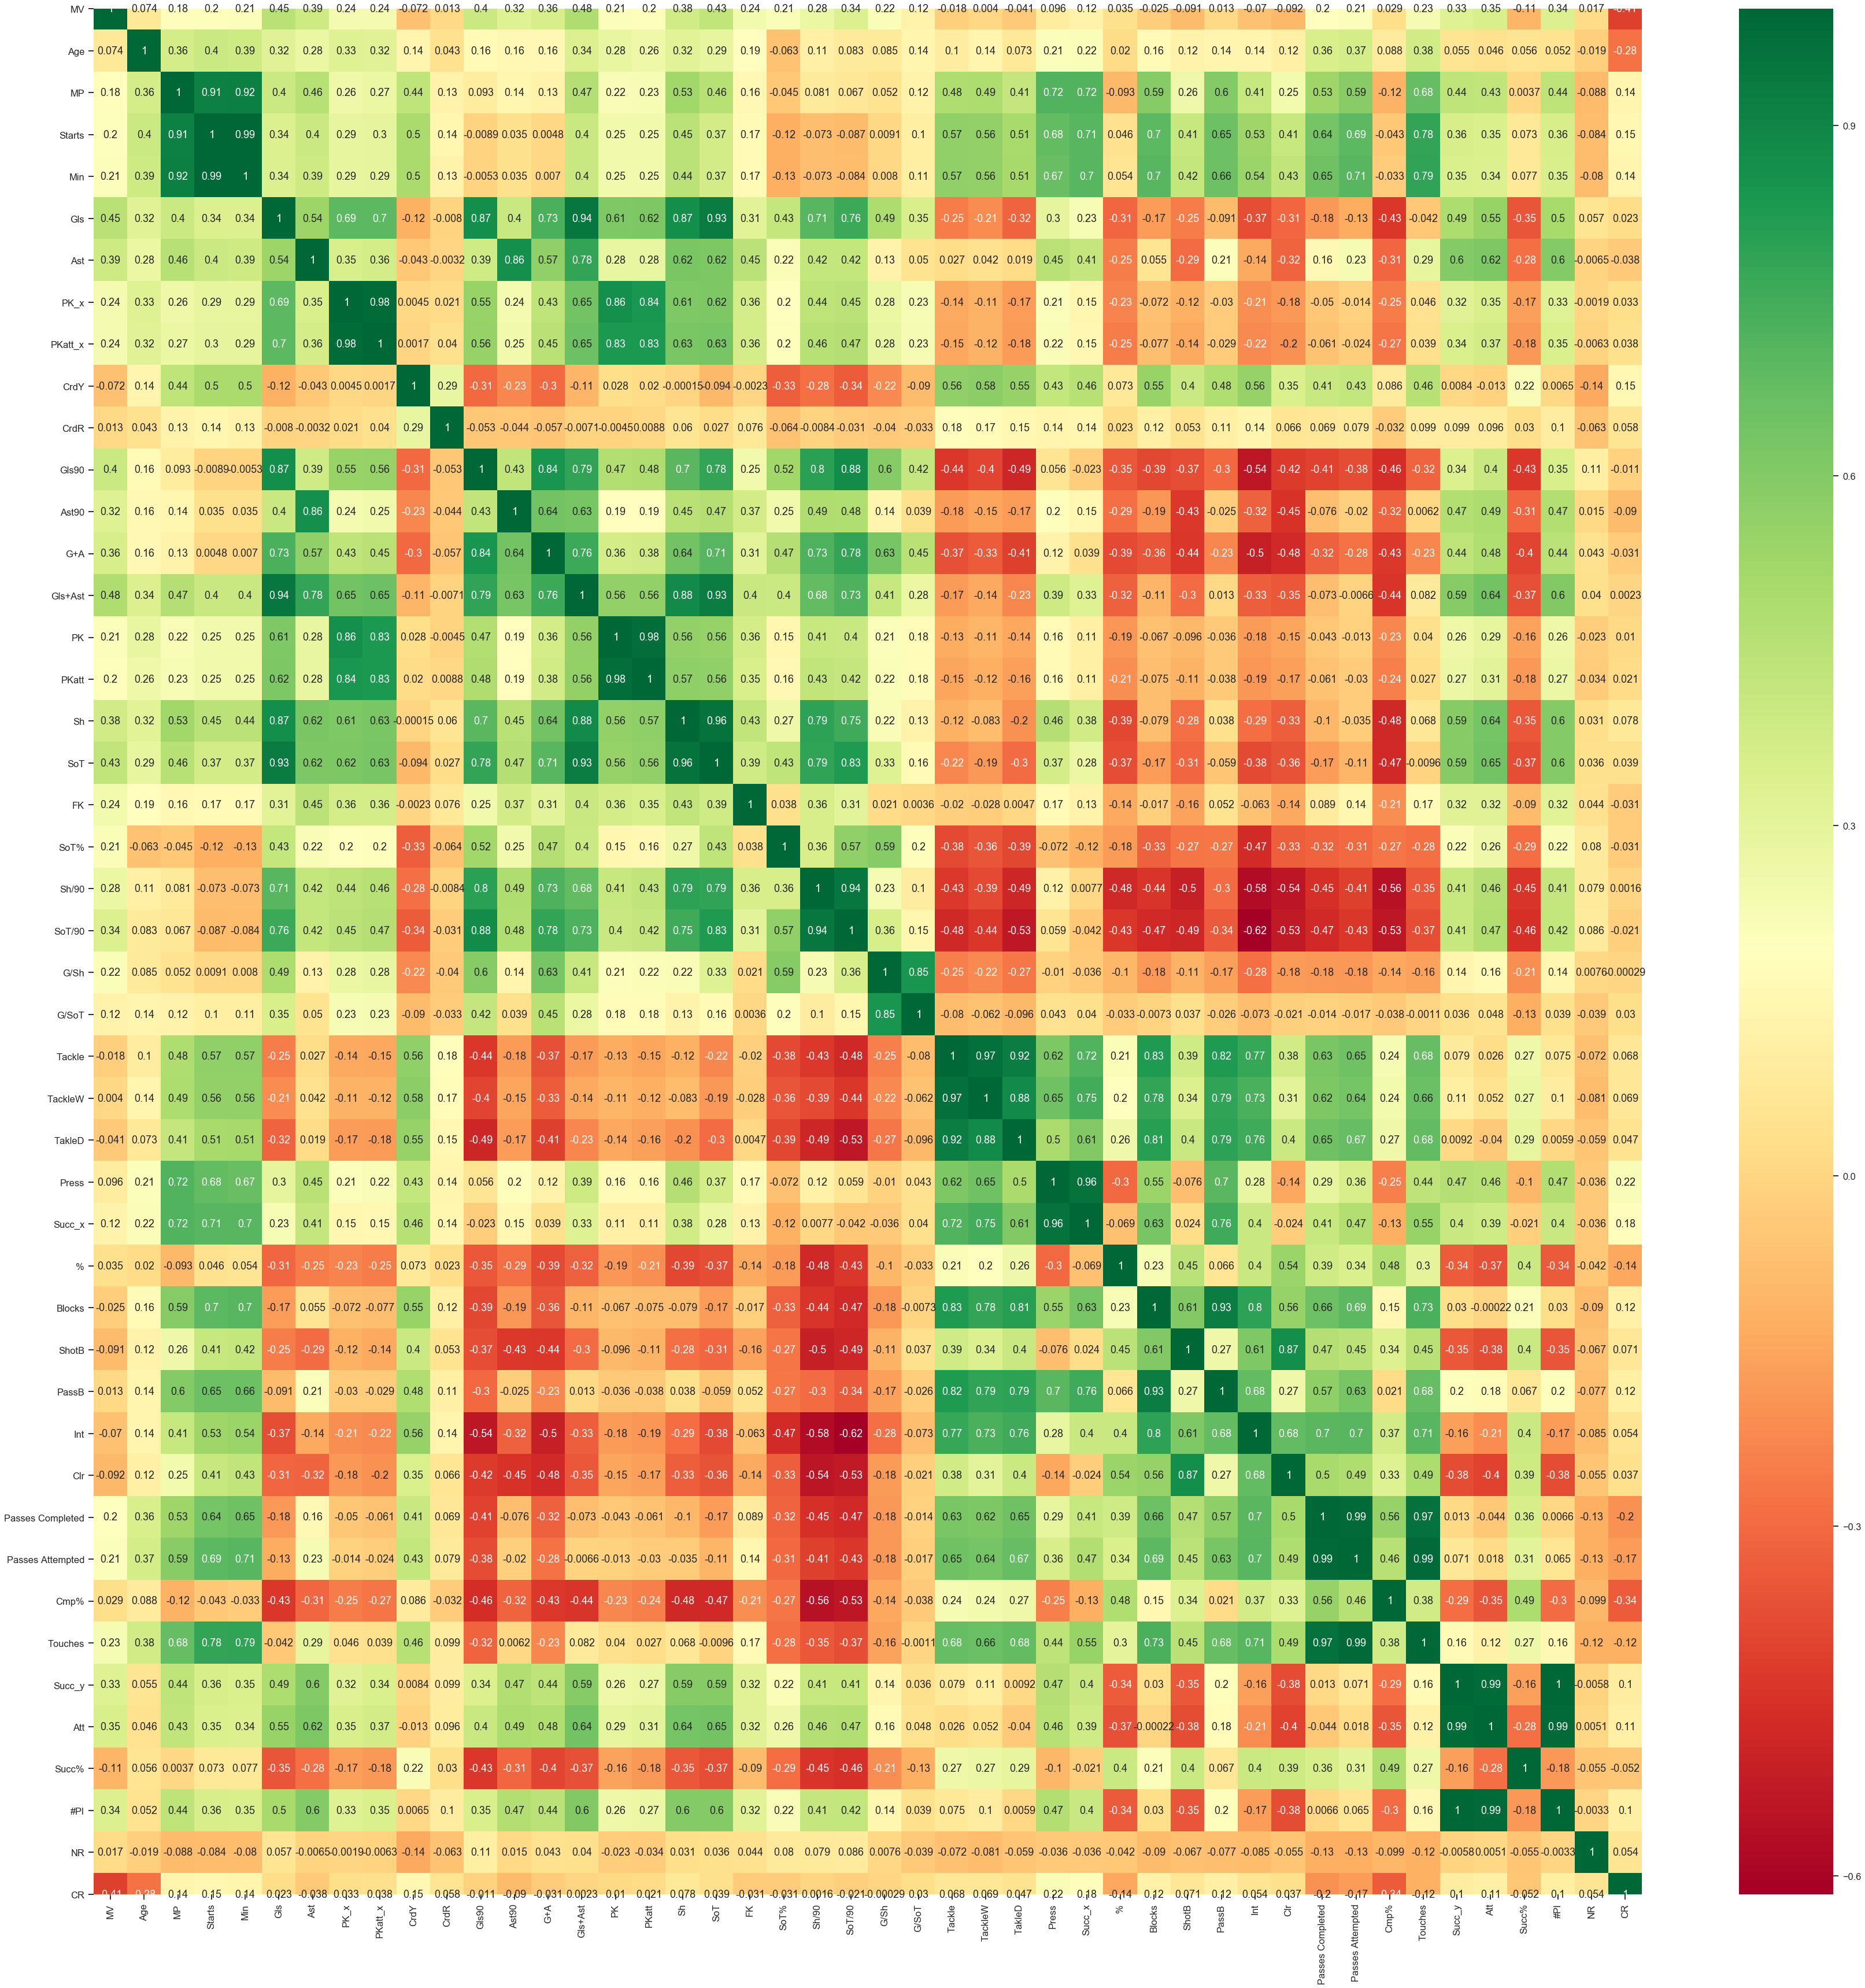

In [34]:
X = df.iloc[:,6::]  #independent columns
y = df.iloc[:,1]
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(60,60))
plt.tight_layout()
sns.set_context('talk')
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [35]:
df.describe().round(1)

,MV,Age,MP,Starts,Min,Gls,Ast,PK_x,PKatt_x,CrdY,CrdR,Gls90,Ast90,G+A,Gls+Ast,PK,PKatt,Sh,SoT,FK,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Tackle,TackleW,TakleD,Press,Succ_x,%,Blocks,ShotB,PassB,Int,Clr,Passes Completed,Passes Attempted,Cmp%,Touches,Succ_y,Att,Succ%,#Pl,NR,CR
count,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0,383.0
mean,35.5,24.2,48.6,41.0,3631.8,8.9,5.6,0.9,1.1,7.1,0.3,0.2,0.1,0.4,14.5,0.4,0.5,68.6,24.9,1.3,34.1,1.7,0.6,0.1,0.3,64.9,42.6,20.7,678.9,189.1,28.6,58.2,11.4,46.7,38.5,74.6,1706.0,2066.8,80.8,2545.9,55.8,90.5,64.4,60.2,1.7,2.0
std,21.8,3.3,14.7,16.2,1399.3,10.0,5.3,2.1,2.4,4.7,0.5,0.2,0.1,0.3,13.6,1.2,1.3,54.2,22.8,3.1,10.4,1.1,0.5,0.1,0.2,42.6,28.2,15.3,351.4,94.8,4.5,32.4,12.6,26.7,29.5,93.8,1010.7,1138.8,7.0,1242.0,44.7,74.3,11.5,48.2,0.8,0.9
min,16.0,15.0,6.0,1.0,143.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,1.0,1.0,0.0,29.0,10.0,17.7,1.0,0.0,1.0,0.0,0.0,44.0,66.0,61.4,87.0,1.0,2.0,33.3,1.0,1.0,1.0
25%,20.0,22.0,39.0,28.0,2547.5,2.0,2.0,0.0,0.0,4.0,0.0,0.1,0.0,0.1,5.0,0.0,0.0,28.0,8.0,0.0,26.7,0.7,0.2,0.1,0.2,32.0,22.5,8.5,417.5,120.5,25.4,33.5,4.0,28.0,15.0,16.0,952.0,1221.0,75.4,1666.5,24.0,35.5,57.1,25.0,1.0,1.0
50%,28.0,24.0,53.0,43.0,3840.0,5.0,4.0,0.0,0.0,6.0,0.0,0.1,0.1,0.3,10.0,0.0,0.0,52.0,17.0,0.0,33.6,1.6,0.5,0.1,0.3,57.0,36.0,18.0,613.0,174.0,27.9,53.0,7.0,43.0,30.0,39.0,1491.0,1872.0,81.4,2345.0,45.0,70.0,63.6,48.0,1.0,2.0
75%,40.5,27.0,60.0,55.0,4795.0,12.5,8.0,0.5,1.0,10.0,0.0,0.3,0.2,0.6,21.0,0.0,0.0,103.5,36.0,1.0,40.5,2.5,1.0,0.2,0.4,88.5,57.5,30.0,920.5,253.5,31.4,78.0,14.0,61.0,57.5,90.0,2383.5,2829.5,86.3,3392.0,81.5,130.5,71.2,87.5,2.0,3.0
max,180.0,34.0,71.0,69.0,6174.0,58.0,30.0,15.0,16.0,23.0,3.0,1.2,0.6,2.5,88.0,11.0,12.0,313.0,140.0,32.0,100.0,5.8,2.7,0.6,1.4,261.0,172.0,92.0,1751.0,498.0,44.1,195.0,97.0,164.0,154.0,550.0,5145.0,5872.0,94.6,6480.0,300.0,485.0,100.0,315.0,3.0,3.0


In [126]:
DF.drop(DF.columns[-1],axis=1,inplace=True)

In [144]:
DF

,Age,MP,Min,Gls,Ast,PK_x,PKatt_x,CrdY,CrdR,Gls90,Ast90,G+A,Gls+Ast,PK,PKatt,Sh,SoT,FK,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Tackle,TackleW,TakleD,Press,Succ_x,%,Blocks,ShotB,PassB,Int,Clr,Passes Completed,Passes Attempted,Cmp%,Touches,Succ_y,Att,Succ%,#Pl
1,24,60,4968,29,10,0,1,8,0,0.53,0.18,0.71,39,0,1,153,62,1,40.52,2.77,1.12,0.19,0.47,62,41,18,849,249,29.33,58,4,54,27,13,1963,2414,81.32,3209,139,258,53.88,151
2,27,32,2757,28,13,9,10,6,1,0.91,0.42,1.33,41,4,5,115,52,10,45.22,3.75,1.70,0.24,0.54,31,17,9,381,103,27.03,24,0,24,10,2,1588,2016,78.77,2696,164,292,56.16,184
3,27,64,5327,37,8,0,0,4,0,0.63,0.14,0.77,45,0,0,150,72,0,48.00,2.53,1.22,0.25,0.51,90,61,22,1151,342,29.71,64,8,56,28,11,1728,2214,78.05,3050,128,212,60.38,142
4,27,65,5579,39,15,6,6,2,0,0.63,0.24,0.87,54,3,3,240,103,3,42.92,3.87,1.66,0.16,0.38,34,25,7,1103,320,29.01,31,5,26,12,5,1516,2029,74.72,2893,137,229,59.83,148
5,26,50,4382,29,6,6,6,8,0,0.60,0.12,0.72,35,2,2,160,67,5,41.88,3.29,1.38,0.18,0.43,25,16,5,743,179,24.09,38,14,24,5,34,744,1060,70.19,1684,67,121,55.37,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,26,26,1600,1,0,0,0,4,0,0.06,0.00,0.06,1,0,0,6,2,0,33.30,0.34,0.11,0.17,0.50,48,36,12,278,94,33.80,36,6,30,22,22,1098,1217,90.20,1406,31,54,57.40,33
379,26,14,1189,0,1,0,0,4,0,0.00,0.08,0.08,1,0,0,2,0,0,0.00,0.15,0.00,0.00,0.00,10,6,4,101,36,35.60,20,10,10,18,33,839,892,94.10,979,7,10,70.00,8
380,29,27,2276,1,3,0,0,2,0,0.04,0.12,0.16,4,0,0,8,3,4,37.50,0.32,0.12,0.13,0.33,66,38,28,424,138,32.50,55,5,50,23,67,1515,2000,75.80,2237,9,19,47.40,10
381,31,34,2701,8,3,2,2,5,0,0.27,0.10,0.37,11,2,2,101,26,2,25.70,3.37,0.87,0.06,0.23,33,19,13,611,153,25.00,53,5,48,22,44,964,1413,68.20,1778,34,57,59.60,34


In [98]:
#dataframe.drop(dataframe.columns[-5],axis=1,inplace=True)

,Player,MV,Nation,Pos,Club,Leauge,Age,MP,Starts,Min,Gls,Ast,PK_x,PKatt_x,CrdY,CrdR,Gls90,Ast90,G+A,Gls+Ast,PK,PKatt,Sh,SoT,FK,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Tackle,TackleW,TakleD,Press,Succ_x,%,Blocks,ShotB,PassB,Int,Clr,Passes Completed,Passes Attempted,Cmp%,Touches,Succ_y,Att,Succ%,#Pl,NR,CR
1,Raheem Sterling,128.0,ENG,FW,Manchester City,Premier Leauge,24,60,56,4968,29,10,0,1,8,0,0.53,0.18,0.71,39,0,1,153,62,1,40.52,2.77,1.12,0.19,0.47,62,41,18,849,249,29.33,58,4,54,27,13,1963,2414,81.32,3209,139,258,53.88,151,2,1
2,Neymar,128.0,BRA,"MF,FW",PSG,Ligue1,27,32,31,2757,28,13,9,10,6,1,0.91,0.42,1.33,41,4,5,115,52,10,45.22,3.75,1.70,0.24,0.54,31,17,9,381,103,27.03,24,0,24,10,2,1588,2016,78.77,2696,164,292,56.16,184,1,1
3,Sadio Mané,120.0,SEN,FW,Liverpool,Premier Leauge,27,64,61,5327,37,8,0,0,4,0,0.63,0.14,0.77,45,0,0,150,72,0,48.00,2.53,1.22,0.25,0.51,90,61,22,1151,342,29.71,64,8,56,28,11,1728,2214,78.05,3050,128,212,60.38,142,3,1
4,Mohamed Salah,120.0,EGY,FW,Liverpool,Premier Leauge,27,65,64,5579,39,15,6,6,2,0,0.63,0.24,0.87,54,3,3,240,103,3,42.92,3.87,1.66,0.16,0.38,34,25,7,1103,320,29.01,31,5,26,12,5,1516,2029,74.72,2893,137,229,59.83,148,3,1
5,Harry Kane,120.0,ENG,FW,Tottenham,Premier Leauge,26,50,49,4382,29,6,6,6,8,0,0.60,0.12,0.72,35,2,2,160,67,5,41.88,3.29,1.38,0.18,0.43,25,16,5,743,179,24.09,38,14,24,5,34,744,1060,70.19,1684,67,121,55.37,74,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Nélson Semedo,32.0,POR,DF,Barcelona,La Liga,26,26,20,1600,1,0,0,0,4,0,0.06,0.00,0.06,1,0,0,6,2,0,33.30,0.34,0.11,0.17,0.50,48,36,12,278,94,33.80,36,6,30,22,22,1098,1217,90.20,1406,31,54,57.40,33,2,1
379,Samuel Umtiti,32.0,FRA,DF,Barcelona,La Liga,26,14,13,1189,0,1,0,0,4,0,0.00,0.08,0.08,1,0,0,2,0,0,0.00,0.15,0.00,0.00,0.00,10,6,4,101,36,35.60,20,10,10,18,33,839,892,94.10,979,7,10,70.00,8,1,1
380,Kieran Trippier,28.0,ENG,DF,Atlético Madrid,La Liga,29,27,26,2276,1,3,0,0,2,0,0.04,0.12,0.16,4,0,0,8,3,4,37.50,0.32,0.12,0.13,0.33,66,38,28,424,138,32.50,55,5,50,23,67,1515,2000,75.80,2237,9,19,47.40,10,2,1
381,Ivan Perišić,17.5,CRO,"MF,FW",Inter,Serie A,31,34,30,2701,8,3,2,2,5,0,0.27,0.10,0.37,11,2,2,101,26,2,25.70,3.37,0.87,0.06,0.23,33,19,13,611,153,25.00,53,5,48,22,44,964,1413,68.20,1778,34,57,59.60,34,2,1


In [39]:
dataframe=pd.read_excel('~/Desktop/FOOTBALL/Fpredict.xlsx')

### Multiple Linear Regression


In [253]:




y=df['MV']
X=dataframe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.intercept_)
print(lr.coef_)
y_pred = lr.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head(30)

pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

l=[]
a=0
for i in range(0,len(df1)):
    l.append(i)
df1.index=l

for i in range(0,len(df1)):
    if((df1['Predicted'][i]>=df1['Actual'][i]-10) and (df1['Predicted'][i]<=df1['Actual'][i]+10)):
        a=a+1
    else:
        continue
        
print('Accuracy of prediction is', (round((a/77)*100,2)), '%')

72.23221393515635
[-9.14051726e-02 -4.58549896e-01 -4.07847428e-01 -1.15880069e-04
  2.98605251e-01 -1.14750456e-01  3.53781065e+00 -3.06351126e+00
  1.53453246e+01  1.96719028e+01 -9.26265083e+00  1.83854795e-01
 -7.37907527e+00  5.40979202e+00  9.11021238e-02 -1.94468892e-02
  4.00013563e-01 -3.48388191e-01 -5.41970151e+00  1.00713036e+01
  8.26111888e+01 -2.54809988e+01  1.97895319e-02  2.37322123e-03
 -1.20160942e-02 -3.27825709e-01  8.05597833e-02  2.49284054e-01]
12.840256126490537
0.5996674421381081
14.425932608639927
0.5344614009105508
Accuracy of prediction is 74.03 %


### Lasso Regression 

In [254]:


model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head(30)

l=[]
a=0
for i in range(0,len(df1)):
    l.append(i)
df1.index=l

for i in range(0,len(df1)):
    if((df1['Predicted'][i]>=df1['Actual'][i]-10) and (df1['Predicted'][i]<=df1['Actual'][i]+10)):
        a=a+1
    else:
        continue
        
print('Accuracy of prediction is', (round((a/77)*100,2)), '%')

12.87709229076279
0.5973671969669494
14.407645787451793
0.5356409191460499
Accuracy of prediction is 74.03 %


/Users/bhupendrasingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25424.246368367512, tolerance: 12.561060327868852
  positive)


### Ridge Regression


In [255]:


rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head(30)

l=[]
a=0
for i in range(0,len(df1)):
    l.append(i)
df1.index=l

for i in range(0,len(df1)):
    if((df1['Predicted'][i]>=df1['Actual'][i]-10) and (df1['Predicted'][i]<=df1['Actual'][i]+10)):
        a=a+1
    else:
        continue
        
print('Accuracy of prediction is', (round((a/77)*100,2)), '%')

12.841153233088212
0.599611500337355
14.409447931425241
0.5355247455159439
Accuracy of prediction is 74.03 %


### Random Forest Regression

In [292]:


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
r=RandomForestRegressor()
r.fit(x_train, y_train)
y_pred=r.predict(x_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_train_r= r.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_r)))
print(r2_score(y_train, pred_train_r))

pred_test_r= r.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_r))) 
print(r2_score(y_test, pred_test_r))

l=[]
a=0
for i in range(0,len(df1)):
    l.append(i)
df1.index=l

for i in range(0,len(df1)):
    if((df1['Predicted'][i]>=df1['Actual'][i]-5) and (df1['Predicted'][i]<=df1['Actual'][i]+5)):
        a=a+1
    else:
        continue
        
print('Accuracy of prediction is', (round((a/115)*100,2)), '%')





2.3420016887509627
0.9847257059525983
4.932152718112306
0.9540720169188558
Accuracy of prediction is 93.04 %


/Users/bhupendrasingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
